## Imports

In [644]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

## Load Data

In [645]:
DATA_FOLDER_PATH = os.path.normpath(os.path.join(os.getcwd(), "..", "data"))
mental_health_social_media_raw_df = pd.read_csv(os.path.join(DATA_FOLDER_PATH, "Students Social Media Addiction.csv"))

In [646]:
mental_health_social_media_raw_df.head(5)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


## Process Data

In [647]:
mental_health_social_media_df = mental_health_social_media_raw_df[[
    "Avg_Daily_Usage_Hours",
    "Most_Used_Platform",
    "Mental_Health_Score"
]]

In [648]:
mental_health_social_media_df.head(5)

,Avg_Daily_Usage_Hours,Most_Used_Platform,Mental_Health_Score
0,5.2,Instagram,6
1,2.1,Twitter,8
2,6.0,TikTok,5
3,3.0,YouTube,7
4,4.5,Facebook,6


### Remove NaNs

In [649]:
mental_health_social_media_df[mental_health_social_media_df.isna().any(axis=1)]

,Avg_Daily_Usage_Hours,Most_Used_Platform,Mental_Health_Score


### Discretise Duration of Usage

In [650]:
def get_duration_grp(duration):
    if duration <= 3:
        return "Less than 3 hours"
    if duration <= 4:
        return "3 - 4 hours"
    if duration <= 5:
        return "4 - 5 hours"
    if duration <= 6:
        return "5 - 6 hours"
    return "More than 6 hours"

mental_health_social_media_df["Avg_Daily_Usage_Hours"] = mental_health_social_media_df["Avg_Daily_Usage_Hours"].apply(get_duration_grp)

In [651]:
mental_health_social_media_df

,Avg_Daily_Usage_Hours,Most_Used_Platform,Mental_Health_Score
0,5 - 6 hours,Instagram,6
1,Less than 3 hours,Twitter,8
2,5 - 6 hours,TikTok,5
3,Less than 3 hours,YouTube,7
4,4 - 5 hours,Facebook,6
...,...,...,...
700,4 - 5 hours,TikTok,7
701,More than 6 hours,Instagram,4
702,5 - 6 hours,WeChat,6
703,4 - 5 hours,Twitter,8


### Handle Columns

In [652]:
# rename columns
mental_health_social_media_df.columns = [
    "daily_usage_duration",
    "most_used_platform",
    "score"
]

# reorder columns
mental_health_social_media_df = mental_health_social_media_df[[
    "most_used_platform",
    "daily_usage_duration",
    "score"
]]

In [653]:
mental_health_social_media_df

,most_used_platform,daily_usage_duration,score
0,Instagram,5 - 6 hours,6
1,Twitter,Less than 3 hours,8
2,TikTok,5 - 6 hours,5
3,YouTube,Less than 3 hours,7
4,Facebook,4 - 5 hours,6
...,...,...,...
700,TikTok,4 - 5 hours,7
701,Instagram,More than 6 hours,4
702,WeChat,5 - 6 hours,6
703,Twitter,4 - 5 hours,8


### Aggregate Data

In [654]:
grouped_by_age_and_social_media_df = mental_health_social_media_df \
    .groupby(by=["most_used_platform", "daily_usage_duration"]) \
    .agg("mean") \
    .reset_index()

### Handle Rows

In [655]:
# get most popular platforms
NUM_MOST_POP_PLATFORMS = 3
most_pop_platforms = mental_health_social_media_df["most_used_platform"].value_counts().index.tolist()[:NUM_MOST_POP_PLATFORMS]

In [656]:
most_pop_platforms

['Instagram', 'TikTok', 'Facebook']

In [657]:
# choose rows corresponding to only these platforms
grouped_by_age_and_social_media_df = grouped_by_age_and_social_media_df[grouped_by_age_and_social_media_df["most_used_platform"].isin(most_pop_platforms)]

# arrange rows in ascending order of age group
grouped_by_age_and_social_media_df = grouped_by_age_and_social_media_df.sort_values(by="daily_usage_duration", ascending=True)

In [658]:
grouped_by_age_and_social_media_df

,most_used_platform,daily_usage_duration,score
0,Facebook,3 - 4 hours,7.451613
5,Instagram,3 - 4 hours,7.254902
19,TikTok,3 - 4 hours,6.562500
1,Facebook,4 - 5 hours,6.849057
6,Instagram,4 - 5 hours,6.247312
20,TikTok,4 - 5 hours,6.183673
2,Facebook,5 - 6 hours,6.090909
7,Instagram,5 - 6 hours,5.638298
21,TikTok,5 - 6 hours,5.634615
3,Facebook,Less than 3 hours,7.800000


### Pivot to Wide Form

In [659]:
grouped_by_age_and_social_media_wide_form_df = pd.pivot(
    grouped_by_age_and_social_media_df,
    index="most_used_platform",
    columns="daily_usage_duration",
    values="score"
)

# reorder columns
grouped_by_age_and_social_media_wide_form_df = grouped_by_age_and_social_media_wide_form_df[
    grouped_by_age_and_social_media_wide_form_df.columns[[3, 0, 1, 2, 4]]
]

In [660]:
grouped_by_age_and_social_media_wide_form_df

daily_usage_duration,Less than 3 hours,3 - 4 hours,4 - 5 hours,5 - 6 hours,More than 6 hours
most_used_platform,,,,,
Facebook,7.80,7.451613,6.849057,6.090909,4.833333
Instagram,7.75,7.254902,6.247312,5.638298,4.695652
TikTok,NaN,6.562500,6.183673,5.634615,4.837838


## Plot Heat Map

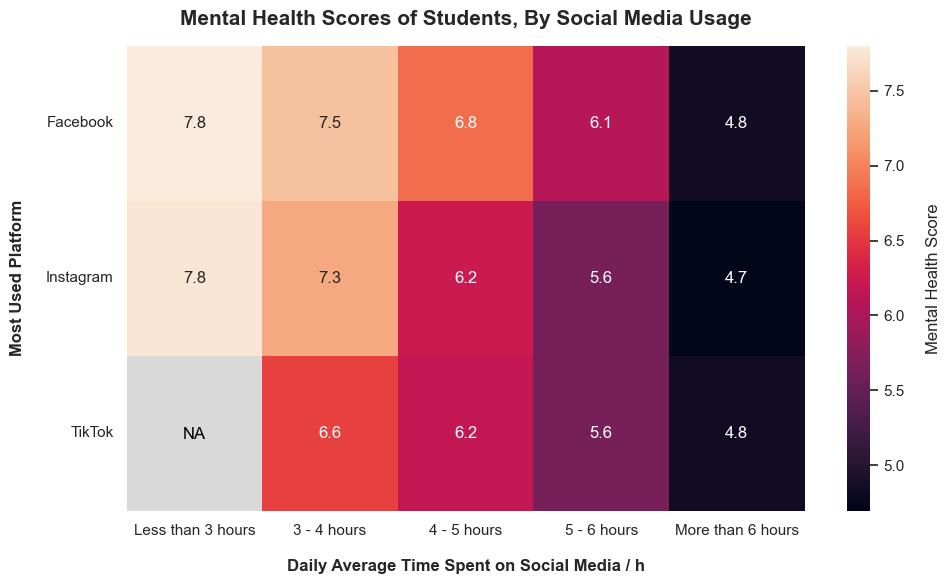

In [661]:
fig, ax = plt.subplots(figsize=(10, 6))

# block out missing values
sns.heatmap(
    np.where(grouped_by_age_and_social_media_wide_form_df.isna(), 0, np.nan),
    cbar=False,
    annot=np.full_like(grouped_by_age_and_social_media_wide_form_df, "NA", dtype=object),
    fmt="",
    annot_kws={"va": "center_baseline", "color": "black"},
    cmap=ListedColormap(["#d9d9d9"]),
    linewidth=0
)

# actual heatmap
sns.heatmap(
    grouped_by_age_and_social_media_wide_form_df,
    annot=True,
    cmap="rocket",
    cbar_kws={"label": "Mental Health Score"}
)
cbar = ax.collections[-1].colorbar
cbar.ax.yaxis.labelpad = 15

# make y-axis ticks horizontal
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# edit labels and legends
ax.set_title("Mental Health Scores of Students, By Social Media Usage", fontweight="bold", fontsize=15, pad=15)
ax.set_xlabel("Daily Average Time Spent on Social Media / h", fontweight="bold", fontsize=12, labelpad=15)
ax.set_ylabel("Most Used Platform", fontweight="bold", fontsize=12, labelpad=15)

plt.tight_layout()
plt.show()